# Importing the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Importing the dataset

In [2]:
data_set = pd.read_csv("Data.csv")
data_set.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


### independent and dependent variables

In [3]:
x = data_set.iloc[:, :-1] # independent variables
y = data_set.iloc[:, -1] # dependent variables

# Taking care of missing data

In [4]:
from sklearn.preprocessing import Imputer

# create imputer objcet for the missing data column
imp_obj = Imputer(missing_values = np.NaN, strategy = "mean", axis = 0).fit(x.iloc[:, 1:])

# tarnsform the missing data to the new non-missing data
x.iloc[:, 1:] = imp_obj.transform(x.iloc[:, 1:])

x.head()

,Country,Age,Salary
0,France,44.0,72000.000000
1,Spain,27.0,48000.000000
2,Germany,30.0,54000.000000
3,Spain,38.0,61000.000000
4,Germany,40.0,63777.777778


# Encoding categorical data

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [6]:
# Encoding the Independent Variables
le_x = LabelEncoder()
x.Country = le_x.fit_transform(x.Country)

# cearte dummy variables with encoder object
ohe_x = OneHotEncoder(categorical_features = [0])
x = ohe_x.fit_transform(x).toarray()

x

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [7]:
# Encoding the Dependent Variables
le_y = LabelEncoder()
y = le_y.fit_transform(y)

y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

x = sc_x.fit_transform(x)

# Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)

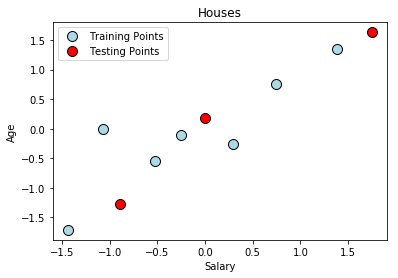

In [10]:
plt.xlabel("Salary")
plt.ylabel("Age")
plt.title("Houses")

plt.plot(xtrain[:, 4], xtrain[:, 3], label = "Training Points", color = 'lightblue', marker = 'o', markersize = 10, linestyle = '', mec = 'k')
plt.plot(xtest[:, 4], xtest[:, 3], label = "Testing Points", color = 'red', marker = 'o', markersize = 10, linestyle = '', mec = 'k')

plt.legend()